In [45]:
import numpy as np
import pandas as pd
import six

In [46]:
data = pd.read_excel("C:/Users/Dell/Desktop/dataset for practice/diabetes_dataset.xlsx")

In [47]:
data.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
x = data.drop(['Outcome'], axis=1)
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [50]:
y = data.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [53]:
model = DecisionTreeClassifier()
model = model.fit(x_train,y_train)
y_predict= model.predict(x_test)

In [54]:
from sklearn import metrics

In [55]:
print('confusion matrix:', confusion_matrix(y_test, y_predict))
print('accuracy:', metrics.accuracy_score(y_test, y_predict)* 100)
print('report:', classification_report(y_test, y_predict))

confusion matrix: [[78 21]
 [24 31]]
accuracy: 70.77922077922078
report:               precision    recall  f1-score   support

           0       0.76      0.79      0.78        99
           1       0.60      0.56      0.58        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.71      0.71       154



In [56]:
confusion_matrix(y_test,y_predict)

array([[78, 21],
       [24, 31]], dtype=int64)

In [129]:
print('Accuracy:',((83+24)/154))

Accuracy: 0.6948051948051948


In [130]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        99
           1       0.60      0.56      0.58        55

    accuracy                           0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.70      0.71      0.71       154



In [131]:
model.predict([[87,24,42,53.54,0,12,34,65.4]])

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [132]:
model_gini = DecisionTreeClassifier(criterion= 'gini', random_state= 100,max_depth= 3, min_samples_leaf =4)
model_gini = model.fit(x_train,y_train)
y_pred= model_gini.predict(x_test)

In [133]:
print('Accuracy:',metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 72.72727272727273


In [134]:
model_entropy = DecisionTreeClassifier(criterion= 'entropy', random_state= 100,max_depth= 3, min_samples_leaf =4)
model_entropy = model.fit(x_train,y_train)
y_prediction= model_entropy.predict(x_test)

In [135]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 72.72727272727273


Using Entropy and gini, classification rate increased to 72.72%, which is better than previous accuracy.

In [153]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

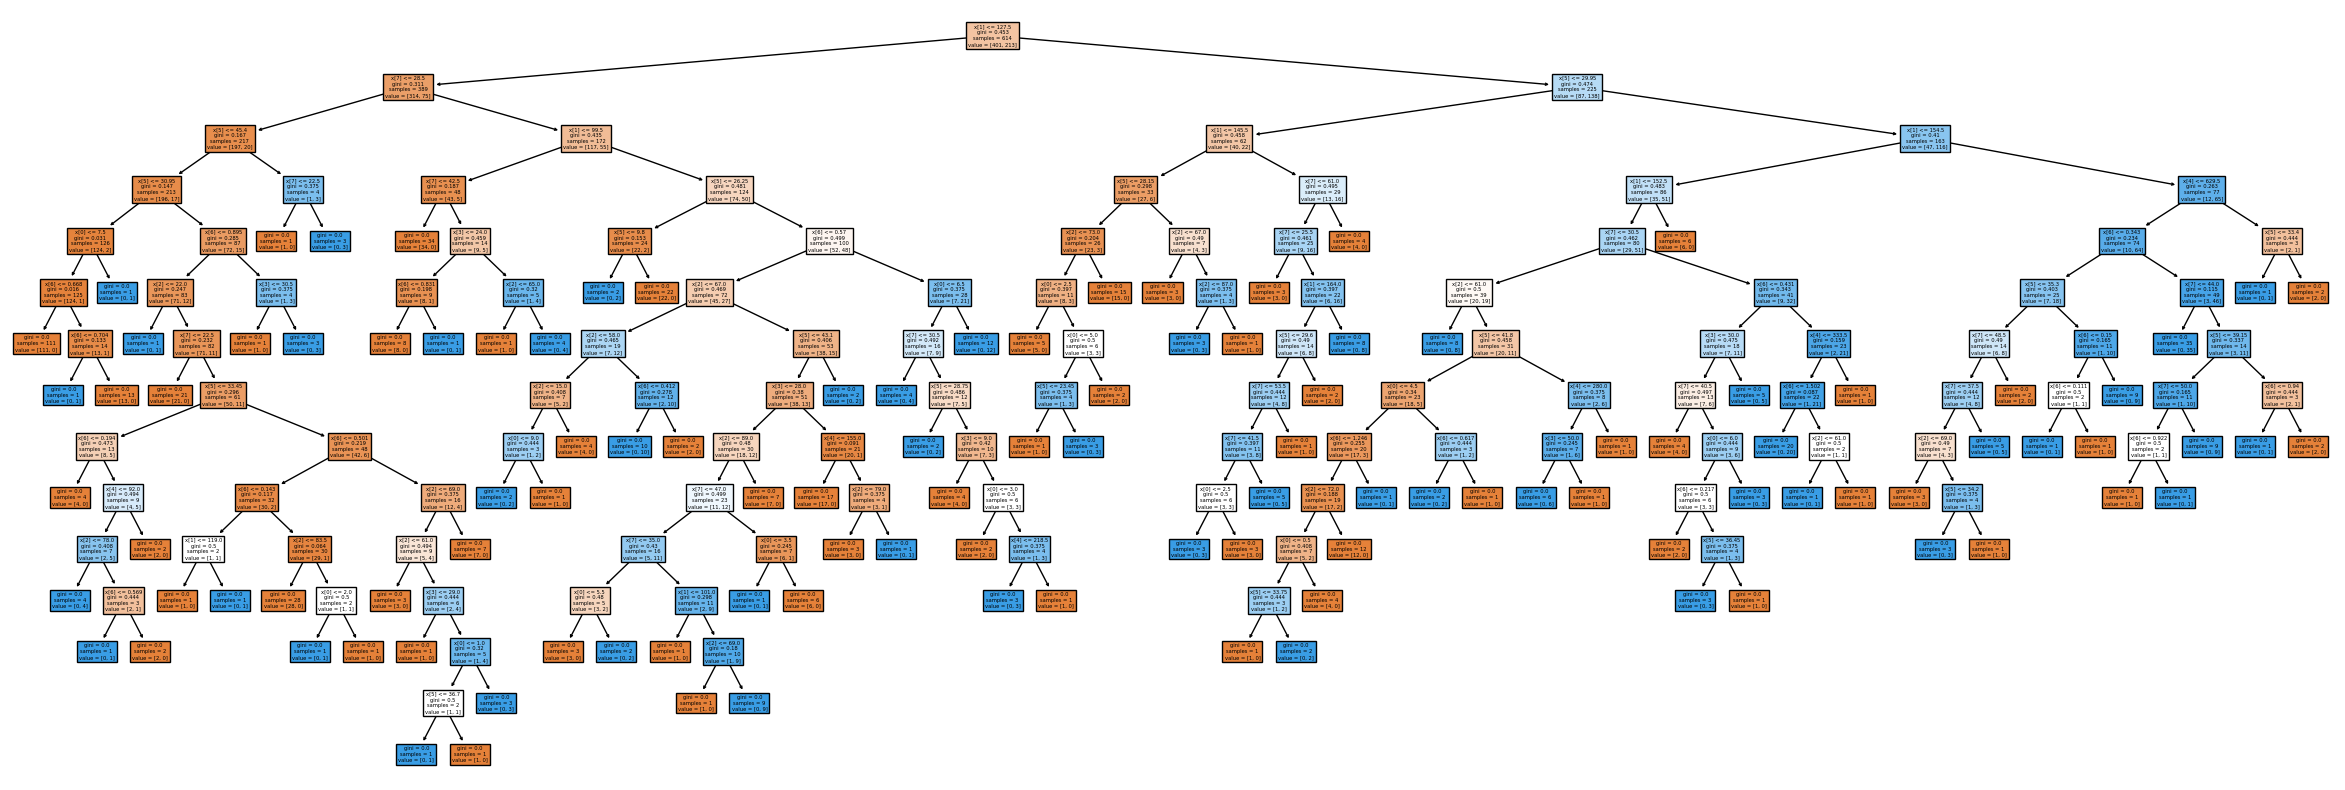

In [161]:
plt.figure(figsize=(30,10))
plot_tree(model_entropy,filled = True,impurity = True)
plt.show()

Above is the Visualized version of the made decision tree.